In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from global_land_mask import globe
import scipy.stats as stats

In [3]:
# Load datasets

dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202102.GLO.RL06M.MSCNv02CRI.nc") # GRACE data

Text(0, 0.5, 'Surface load (cm water equiv.)')

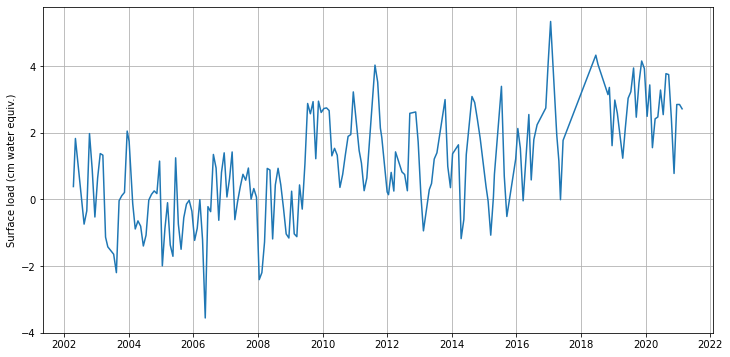

In [4]:
# surface mass load for seattle

seattle = ds.isel(lat=47, lon=-122)
plt.subplots(figsize=(12,6))
plt.plot(seattle.time,seattle.lwe_thickness)
plt.grid()
plt.ylabel('Surface load (cm water equiv.)')

In [32]:
ds['lwe_thickness']

<xarray.DataArray 'lwe_thickness' (time: 194, lat: 360, lon: 720)>
array([[[-3.999975, -3.999975, ..., -3.999975, -3.999975],
        [-3.999975, -3.999975, ..., -3.999975, -3.999975],
        ...,
        [-0.962672, -0.962672, ..., -0.962672, -0.962672],
        [-0.962672, -0.962672, ..., -0.962672, -0.962672]],

       [[-4.795514, -4.795514, ..., -4.795514, -4.795514],
        [-4.795514, -4.795514, ..., -4.795514, -4.795514],
        ...,
        [-3.527134, -3.527134, ..., -3.527134, -3.527134],
        [-3.527134, -3.527134, ..., -3.527134, -3.527134]],

       ...,

       [[ 8.790141,  8.790141, ...,  8.790141,  8.790141],
        [ 8.790141,  8.790141, ...,  8.790141,  8.790141],
        ...,
        [ 1.653089,  1.653089, ...,  1.653089,  1.653089],
        [ 1.653089,  1.653089, ...,  1.653089,  1.653089]],

       [[11.90318 , 11.90318 , ..., 11.90318 , 11.90318 ],
        [11.90318 , 11.90318 , ..., 11.90318 , 11.90318 ],
        ...,
        [ 8.883614,  8.883614, ...,  8.883614,  8.883614],
        [ 8.883614,  8.883614, ...,  8.883614,  8.883614]]])
Coordinates:
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 2002-04-17T12:00:00 ... 2021-02-15
Attributes:
    units:          cm
    long_name:      Liquid_Water_Equivalent_Thickness
    standard_name:  Liquid_Water_Equivalent_Thickness
    grid_mapping:   WGS84
    valid_min:      -1747.2542528975755
    valid_max:      770.3680244328248
    comment:        Coastline Resolution Improvement (CRI) filter is applied

In [5]:
number_of_time_steps = len(ds.time)
data_matrix = np.zeros((360*720,number_of_time_steps))

for i in range(number_of_time_steps):
    this_data = ds.isel(time=i).lwe_thickness
    data_matrix[:,i] = this_data.values.flatten()

## Singular Value Decomposition

The Singular Value Decomposition writes a matrix D as:

D = U * S * V

In [6]:
from scipy.sparse.linalg import svds

u,s,v = svds(data_matrix,k=7)

## Plotting eigenvalues

In [7]:
# Explained variance = the amount of variance explained by each of the selected components. 

explained_var = np.flip(s, 0)
normalized_ex_var = explained_var/sum(s)

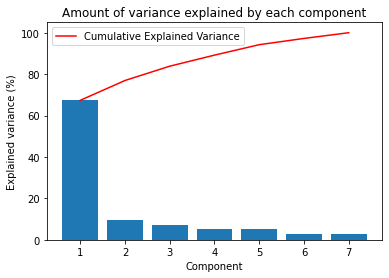

In [8]:
plt.bar(range(1,len(s)+1),normalized_ex_var*100)
plt.title("Amount of variance explained by each component")
plt.xlabel("Component")
plt.ylabel("Explained variance (%)")
plt.plot(range(1,len(explained_var)+1),
         np.cumsum(normalized_ex_var*100),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

In [9]:
longitude = np.linspace(0, 360, 720)
latitude = np.linspace(-90, 90, 360) 

In [10]:
def plot_eigenvalues(which_mode):
    first_left_singular_vector = np.reshape(u[:,which_mode],this_data.values.shape)
    first_right_singular_vector = v[which_mode,:]
    
    plt.subplots(2,1,figsize=(12,12))
    plt.subplot(2,1,1)
    plt.pcolor(longitude,latitude,first_left_singular_vector,vmin=-0.005,vmax=0.005)
    plt.colorbar()
    plt.title('Surface load (cm water equiv.)', fontsize = 18)
    plt.xlabel("Longitude", fontsize = 18)
    plt.ylabel("Latitude", fontsize = 18)
    
    plt.subplot(2,1,2)
    plt.plot(ds.time,first_right_singular_vector)
    plt.xlabel('Year', fontsize = 18)
    plt.ylabel('Surface load (cm water equiv.)', fontsize = 18)
    plt.title("Surface mass load from 2002 to 2021", fontsize = 18)
    
    
# print(first_left_singular_vector.shape)
# print(first_right_singular_vector.shape)

<ipython-input-10-02d2317f8cae>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(longitude,latitude,first_left_singular_vector,vmin=-0.005,vmax=0.005)


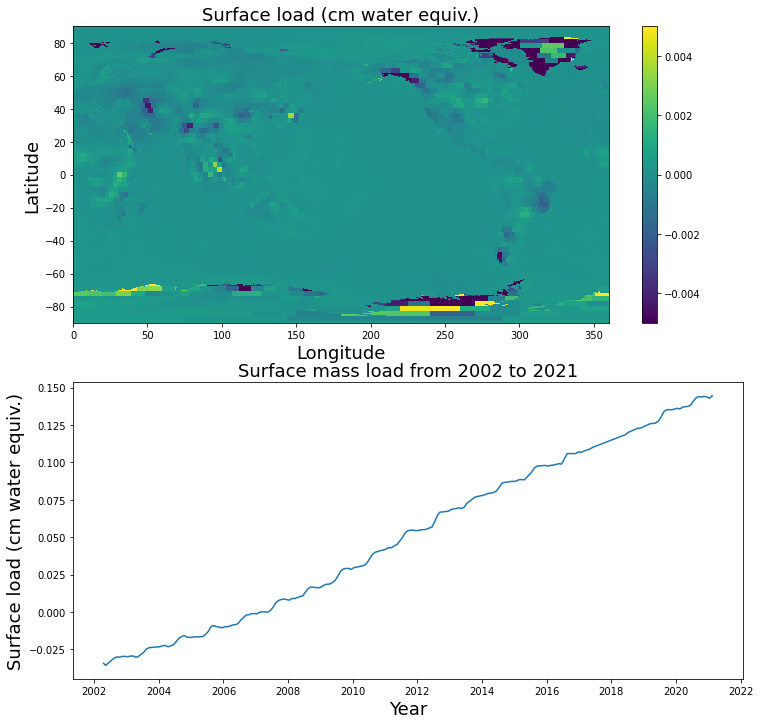

In [11]:
plot_eigenvalues(6)

<ipython-input-10-02d2317f8cae>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(longitude,latitude,first_left_singular_vector,vmin=-0.005,vmax=0.005)
<ipython-input-10-02d2317f8cae>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(longitude,latitude,first_left_singular_vector,vmin=-0.005,vmax=0.005)
<ipython-input-10-02d2317f8cae>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated s

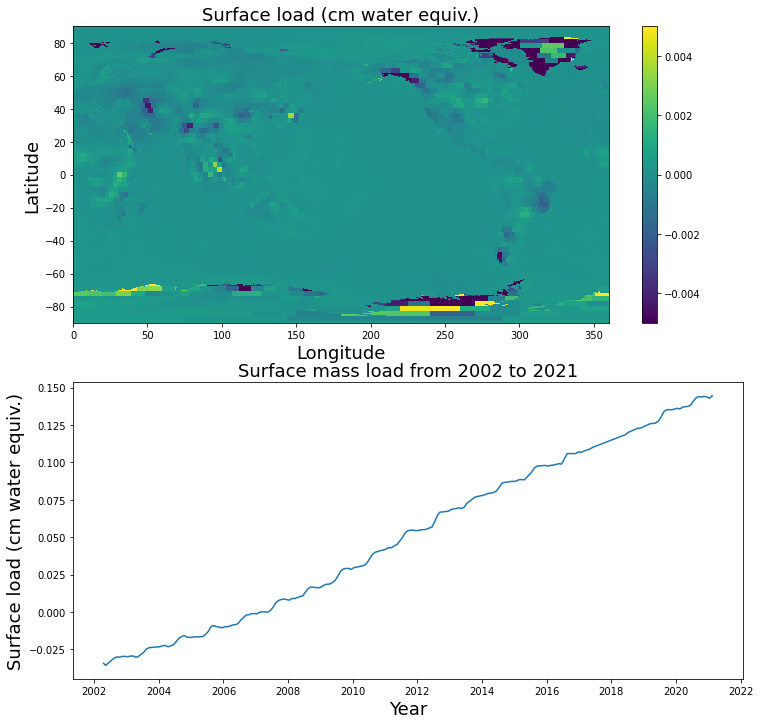

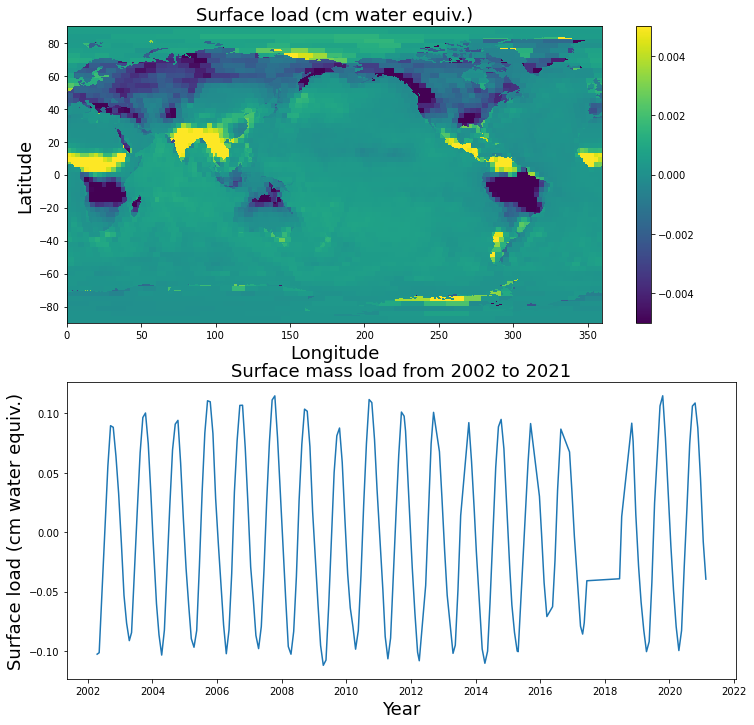

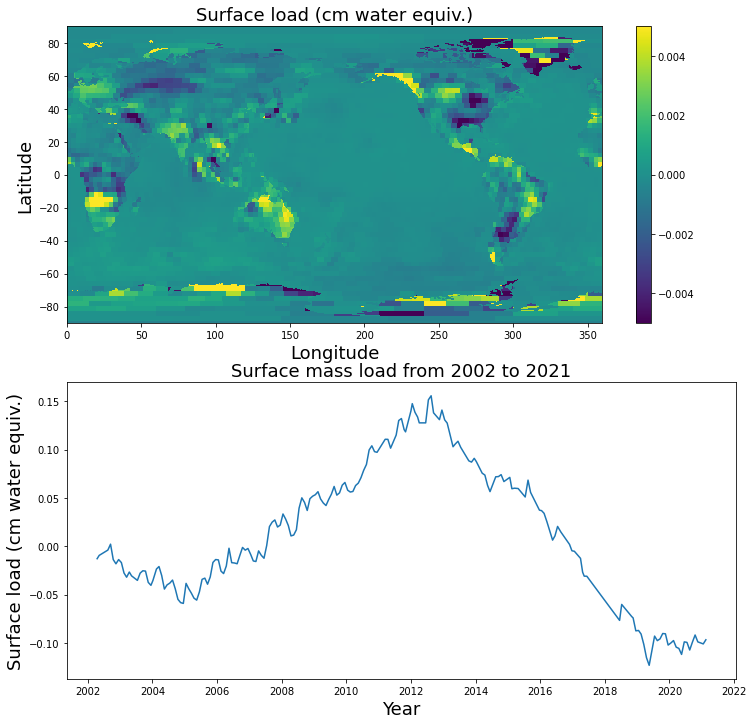

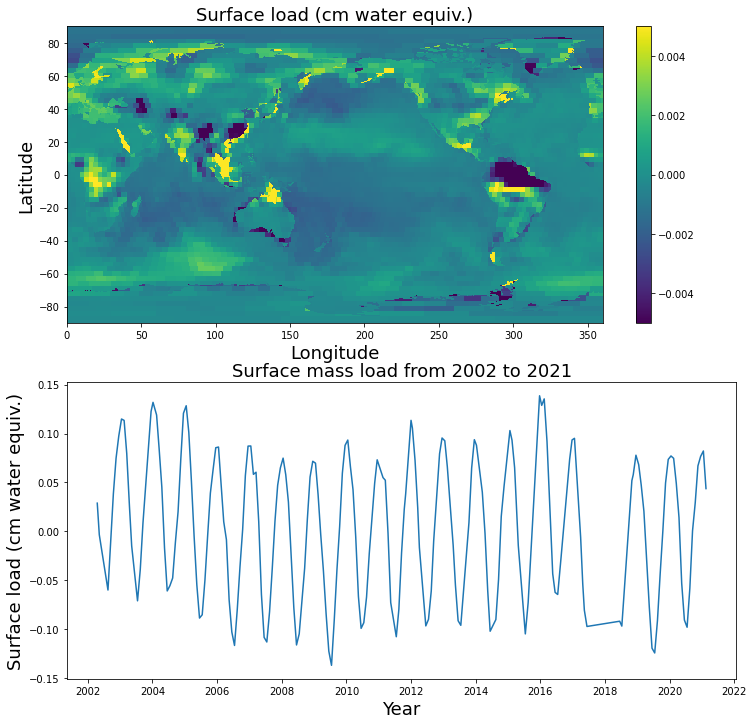

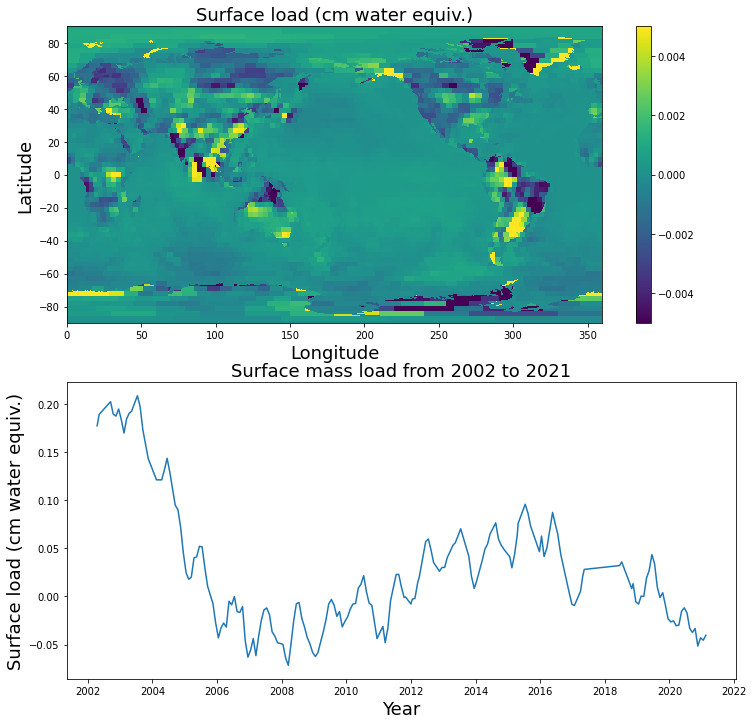

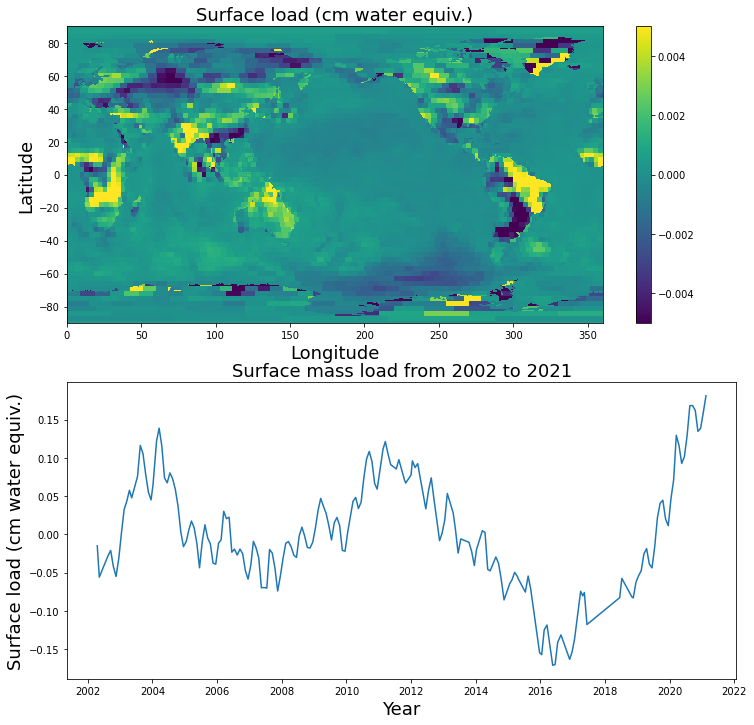

In [12]:
# graphs arranged from spatial patterns constructed from first PC to sixth PC

n = 7

for i in range(1,n):
    plot_eigenvalues(n-i)

In [13]:
s[6]/sum(s)

0.6733909027650883

## Calculation of the surface mass load at a given point in space and time

D = U * S * V, so to approximate D using the first mode, you would use

D = U[:,6]*S[6]@V[6,:]

Then every column will need to be np.reshaped()'d to the right size to make a map

In [14]:
type(data_matrix)
print(u[:,6].shape)
print(s[6].shape)
print(v[6,:].shape)

(259200,)
()
(194,)


## Reconstruction of the data using each primary component

In [15]:
# Function for reconstruction of data

def D_reconstruct(which_PC):
    D_reconstruct = u[:,which_PC].reshape(259200,1)*s[which_PC]@v[which_PC,:].reshape(1,194)
    return D_reconstruct

### D = Reconstruction of the data using PCs

In [16]:
n = 7

for i in range(1,n):
    exec(f'D_{i} = D_reconstruct(n - i)')
    
# D_1 is the reconstructed surface load data using first PC = D_reconstruct(6)
# D_2 is the reconstructed surface load data using second PC = D_reconstruct(5)

In [17]:
len(D_1)

259200

### Finding surface mass load at times when earthquakes occured from reconstructed data

In [18]:
# Earthquake catalog with lat, long, time etc.

catalog = pd.read_csv(dataset_path + 'ind_and_bg_probs.csv') 
catalog["time"] = catalog["time"].astype("datetime64")

In [19]:
type(catalog)

pandas.core.frame.DataFrame

In [20]:
catalog_array = catalog.to_numpy()

eq_lat = catalog_array[:,1]
eq_lon = catalog_array[:,2]
eq_time = catalog_array[:,3]
total = len(catalog)
D_eq_values = np.zeros(total)

In [21]:
# Function to calculate a specific D value for time of earthquake

def calculate_D_eq(eq_time, eq_lat, eq_lon, which_D):
    time_index = np.argmin(np.abs(ds.time.values - np.datetime64(eq_time)))
    lat_index = np.argmin(np.abs(ds.lat.values - eq_lat))
    lon_index = np.argmin(np.abs(ds.lon.values - eq_lon))
    nlong = len(ds.lon)
    pos_index = (lat_index -1) * nlong + lon_index
    return which_D[pos_index, time_index]

# Function to calculate a D values value at times of earthquake occurence using 
# (specify using which primary component)

def calculate_D_eq_values(which_D):
    D_eq_values = [0 for i in range(total)]
    for i in range(total):
        D_eq_values[i] = calculate_D_eq(eq_time[i], eq_lat[i], eq_lon[i], which_D)
    return np.array(D_eq_values)

In [22]:
D_eq_1 = calculate_D_eq_values(D_1)
D_eq_2 = calculate_D_eq_values(D_2)
D_eq_3 = calculate_D_eq_values(D_3)
D_eq_4 = calculate_D_eq_values(D_4)
D_eq_5 = calculate_D_eq_values(D_5)
D_eq_6 = calculate_D_eq_values(D_6)

In [57]:
# saving reconstructed D values to csv files
    
# np.savetxt('D_1.csv', D_1, delimiter=',')
# np.savetxt('D_2.csv', D_2, delimiter=',')
# np.savetxt('D_3.csv', D_3, delimiter=',')
# np.savetxt('D_4.csv', D_4, delimiter=',')
# np.savetxt('D_5.csv', D_5, delimiter=',')
# np.savetxt('D_6.csv', D_6, delimiter=',')

In [58]:
# saving D values for times of earthquake occurence to csv file

# np.savetxt('D_eq_1.csv', D_eq_1, delimiter=',')
# np.savetxt('D_eq_2.csv', D_eq_2, delimiter=',')
# np.savetxt('D_eq_3.csv', D_eq_3, delimiter=',')
# np.savetxt('D_eq_4.csv', D_eq_4, delimiter=',')
# np.savetxt('D_eq_5.csv', D_eq_5, delimiter=',')
# np.savetxt('D_eq_6.csv', D_eq_6, delimiter=',')

## Singular Value Decomposition for detrended data

In [23]:
from scipy import signal

data_matrix_detrend = signal.detrend(data_matrix)

u,s,v = svds(data_matrix_detrend,k=7)

In [24]:
explained_var = np.flip(s, 0)
normalized_ex_var = explained_var/sum(s)

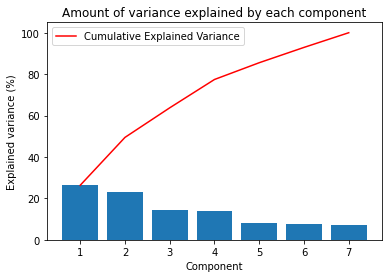

In [25]:
plt.bar(range(1,len(s)+1),normalized_ex_var*100)
plt.title("Amount of variance explained by each component")
plt.xlabel("Component")
plt.ylabel("Explained variance (%)")
plt.plot(range(1,len(explained_var)+1),
         np.cumsum(normalized_ex_var*100),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

<ipython-input-10-02d2317f8cae>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(longitude,latitude,first_left_singular_vector,vmin=-0.005,vmax=0.005)
<ipython-input-10-02d2317f8cae>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(longitude,latitude,first_left_singular_vector,vmin=-0.005,vmax=0.005)
<ipython-input-10-02d2317f8cae>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated s

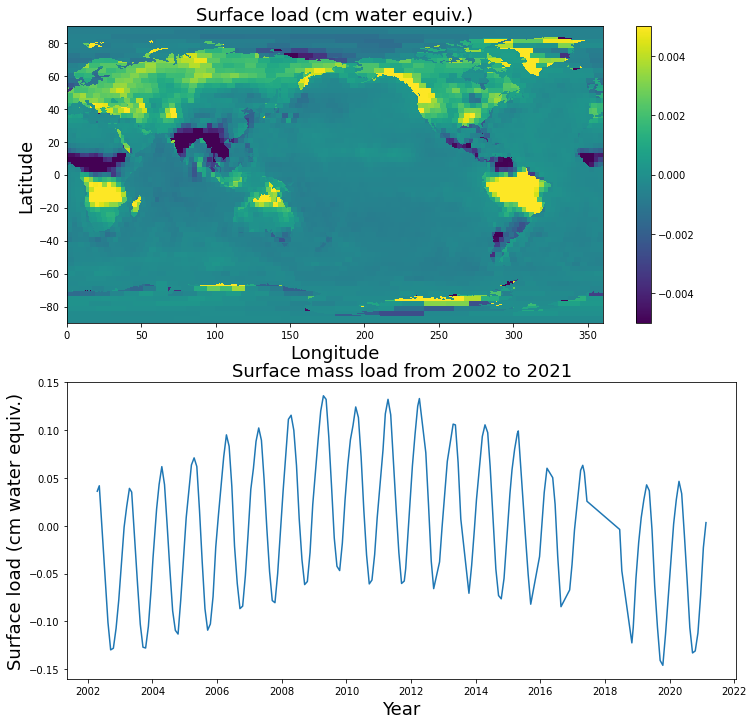

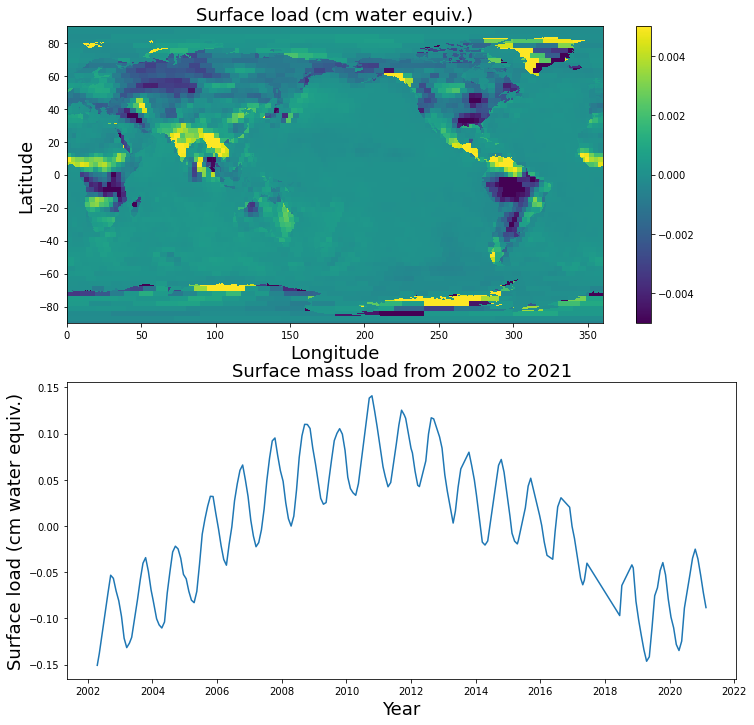

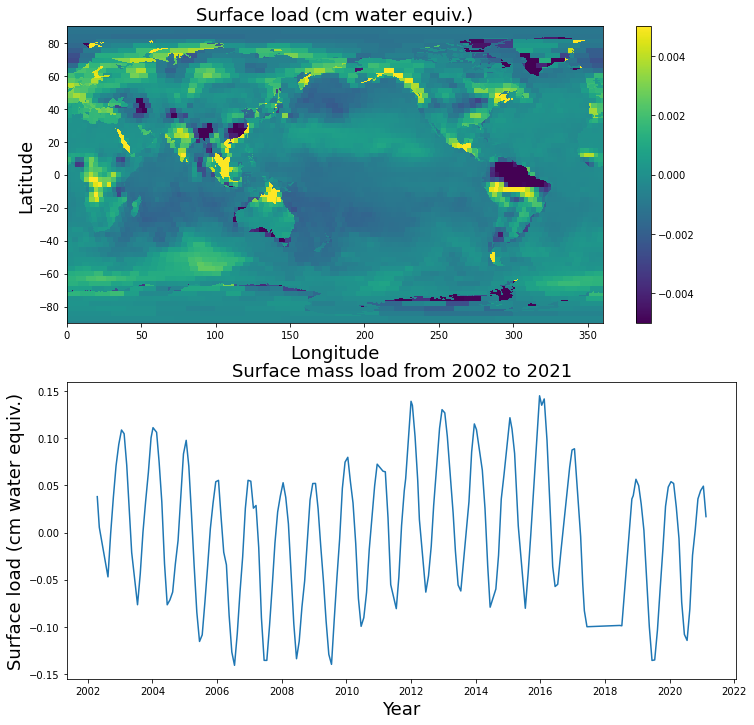

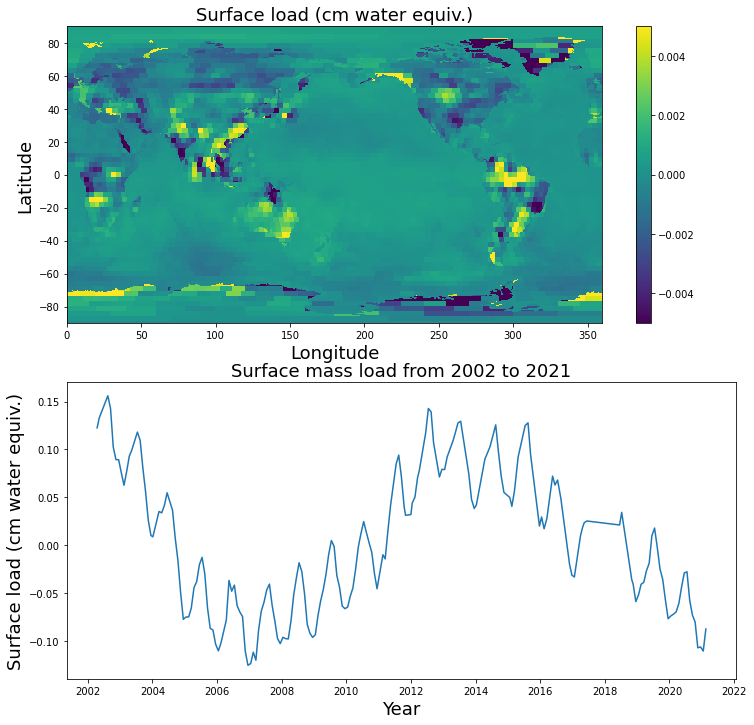

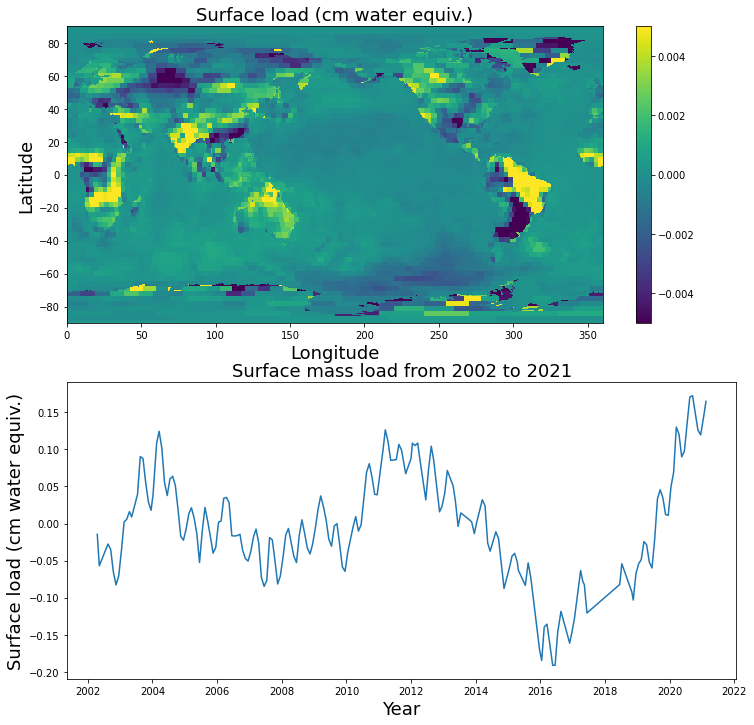

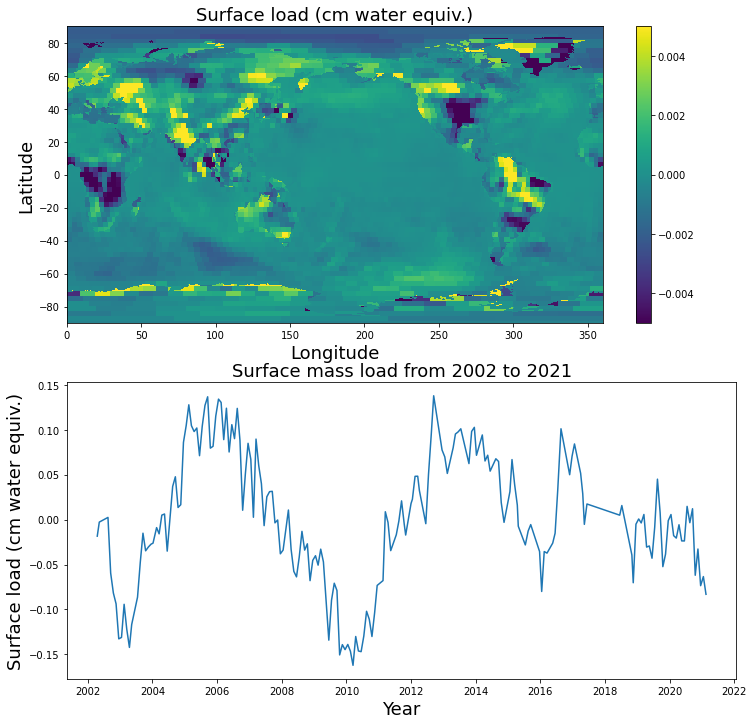

In [26]:
# graphs arranged from spatial patterns constructed from first PC to sixth PC

for i in range(1,7):
    plot_eigenvalues(n-i)

## Reconstruction of the detrended data using each primary component

In [27]:
n = 7

for i in range(1,n):
    exec(f'D_detrend_{i} = D_reconstruct(n - i)')

### Finding surface mass load at times when earthquakes occured from reconstructed data

In [28]:
D_detrend_eq_1 = calculate_D_eq_values(D_detrend_1)
D_detrend_eq_2 = calculate_D_eq_values(D_detrend_2)
D_detrend_eq_3 = calculate_D_eq_values(D_detrend_3)
D_detrend_eq_4 = calculate_D_eq_values(D_detrend_4)
D_detrend_eq_5 = calculate_D_eq_values(D_detrend_5)
D_detrend_eq_6 = calculate_D_eq_values(D_detrend_6)

In [88]:
# # saving reconstructed D values to csv files
    
# np.savetxt('D_detrend_1.csv', D_1, delimiter=',')
# np.savetxt('D_detrend_2.csv', D_2, delimiter=',')
# np.savetxt('D_detrend_3.csv', D_3, delimiter=',')
# np.savetxt('D_detrend_4.csv', D_4, delimiter=',')
# np.savetxt('D_detrend_5.csv', D_5, delimiter=',')
# np.savetxt('D_detrend_6.csv', D_6, delimiter=',')

# # saving D values for times of earthquake occurence to csv file

# np.savetxt('D_detrend_eq_1.csv', D_eq_1, delimiter=',')
# np.savetxt('D_detrend_eq_2.csv', D_eq_2, delimiter=',')
# np.savetxt('D_detrend_eq_3.csv', D_eq_3, delimiter=',')
# np.savetxt('D_detrend_eq_4.csv', D_eq_4, delimiter=',')
# np.savetxt('D_detrend_eq_5.csv', D_eq_5, delimiter=',')
# np.savetxt('D_detrend_eq_6.csv', D_eq_6, delimiter=',')

## PCA for Rates of Surface Mass Loading

In [39]:
rate_alltime = np.diff(ds['lwe_thickness'])

In [40]:
number_of_time_steps = len(ds.time)
data_matrix = np.zeros((360*720,number_of_time_steps))

for i in range(number_of_time_steps):
    #this_data = ds.isel(time=i).lwe_thickness
    this_data = ds.isel(time=i).lwe_thickness
    data_matrix[:,i] = this_data.values.flatten()

AttributeError: 'Dataset' object has no attribute 'rate_alltime'

In [42]:
ds

<xarray.Dataset>
Dimensions:        (lon: 720, lat: 360, time: 194, bounds: 2)
Coordinates:
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat            (lat) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time           (time) datetime64[ns] 2002-04-17T12:00:00 ... 2021-02-15
Dimensions without coordinates: bounds
Data variables:
    lwe_thickness  (time, lat, lon) float64 -4.0 -4.0 -4.0 ... 8.884 8.884 8.884
    uncertainty    (time, lat, lon) float64 ...
    lat_bounds     (lat, bounds) float64 -90.0 -89.5 -89.5 ... 89.5 89.5 90.0
    lon_bounds     (lon, bounds) float64 0.0 0.5 0.5 1.0 ... 359.5 359.5 360.0
    time_bounds    (time, bounds) datetime64[ns] 2002-04-04 ... 2021-02-28T23...
Attributes: (12/53)
    Conventions:                   CF-1.6, ACDD-1.3, ISO 8601
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    title:                         JPL GRACE and GRACE-FO MASCON RL06Mv2 CRI
    summary:                       Monthly gravity solutions from GRACE and G...
    keywords:                      Solid Earth, Geodetics/Gravity, Gravity, l...
    ...                            ...
    C_30_substitution:             TN-14; Loomis et al., 2019, Geophys. Res. ...
    user_note_1:                   The accelerometer on the GRACE-B spacecraf...
    user_note_2:                   The accelerometer on the GRACE-D spacecraf...
    journal_reference:             Watkins, M. M., D. N. Wiese, D.-N. Yuan, C...
    CRI_filter_journal_reference:  Wiese, D. N., F. W. Landerer, and M. M. Wa...
    date_created:                  2021-03-30T09:03:16Z

In [45]:
ds.assign(loading_rate = np.diff(ds['lwe_thickness']))

MissingDimensionsError: cannot set variable 'loading_rate' with 3-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.